# Group 18: How does height, ranking point and game duration relates to the age of right-handed tennis player in 2018

In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
library(dplyr)
library(recipes)
library(cowplot)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

# 1. Introduction:

### The Dataset:
Our project uses the dataset "atp_matches_2018.csv". It is a dataset that describes the game results of a specific tournament. The dataset provides a detailed insight of all statistics relating to that particular match.

### About Our Project:
In professional tennis, players exhibit a wide range of skills and strategies that contribute to their success on the court. Among these factors, some of the significant aspects of a player's game are their preferred hand and their physical data. For example, Rafael Nadal's left-handedness allows him to unique spin and angles, thus forehand shots disrupt opponents' rhythm (Jain, 2022). Due to the absence of sufficient data of left-handed players, in our project, we will be focused primarily on predicting the age of right-handed player based on ranking points, height and game duration. 

Players tend to accumulate more points during their peak years and fewer points as they age. Younger players may also have shorter heights as they haven't reached their peak yet (Medical News Today, 2023). Additionally, younger players' superior health often leads to better performance, potentially resulting in shorter game durations (Tanaka, 2023).

Being able to make connections and prediction of age through these predictors allows us to further rationalize the relationships, and provide the public a biref understanding of whether age would affect the performance of tennis athelets. 



### Our Project Question:
Our project will investigate how the game duration, rank points and height of tennis players correlate with the age of right-handed players. 


# 2. Methods & Results

### Preliminary exploratory data analysis:


### Data reading
In the following cell, the URL for the CSV file that contains the data set "atp_matches_2018.csv" on Github was assigned to a variable called `url`. Using the `read_csv` function, `url` was read and its contents stored as player_stats. The dataset was processed to generate the displayed table. Subsequently, a descriptive label was printed below the table to provide clearer context regarding its contents.


In [2]:
url <- "https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2018.csv"
player_stats <- read_csv(url)
head(player_stats)

Rows: 2897 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tourney_id, tourney_name, surface, tourney_level, winner_entry, wi...
dbl (35): draw_size, tourney_date, match_num, winner_id, winner_seed, winner...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-M020,Brisbane,Hard,32,A,20180101,271,105992,NA,NA,⋯,47,33,19,14,1,4,47,1010,52,909
2018-M020,Brisbane,Hard,32,A,20180101,272,111577,NA,NA,⋯,41,25,7,9,7,11,54,890,94,593
2018-M020,Brisbane,Hard,32,A,20180101,273,104797,NA,NA,⋯,53,37,29,15,10,16,63,809,30,1391
2018-M020,Brisbane,Hard,32,A,20180101,275,200282,NA,WC,⋯,43,33,17,11,4,6,208,245,44,1055
2018-M020,Brisbane,Hard,32,A,20180101,276,111581,NA,Q,⋯,35,28,5,9,0,2,175,299,68,755
2018-M020,Brisbane,Hard,32,A,20180101,277,104999,8,NA,⋯,51,27,8,11,1,6,33,1302,218,235


Table 1. A preview of the 2018 Tennis Player statistic

 ### Data cleaning
 To address our project question, we employed the `grepl`to identify a pattern indicating that all players have a winning hand condition of right-handedness. This filtering approach allows us to focus specifically on players who predominantly use their right hand for winning. A descriptive label for the table was generated and printed.

  After filtering for right-handed players in the dataframe named `player_stats_righthanded`, the data was organized by selecting predictors relevant to our research question: `winner_rank_points`, `winner_ht`, `winner_age`, and `minutes`. The `drop_na()` function was then employed to eliminate rows with missing data for these predictors. A descriptive label for the table was generated and printed for the `player_stats_with_predictor` dataframe.


In [3]:
player_stats_righthanded <- filter (player_stats, winner_hand == 'R')
head(player_stats_righthanded)

tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-M020,Brisbane,Hard,32,A,20180101,271,105992,NA,NA,⋯,47,33,19,14,1,4,47,1010,52,909
2018-M020,Brisbane,Hard,32,A,20180101,272,111577,NA,NA,⋯,41,25,7,9,7,11,54,890,94,593
2018-M020,Brisbane,Hard,32,A,20180101,273,104797,NA,NA,⋯,53,37,29,15,10,16,63,809,30,1391
2018-M020,Brisbane,Hard,32,A,20180101,275,200282,NA,WC,⋯,43,33,17,11,4,6,208,245,44,1055
2018-M020,Brisbane,Hard,32,A,20180101,276,111581,NA,Q,⋯,35,28,5,9,0,2,175,299,68,755
2018-M020,Brisbane,Hard,32,A,20180101,278,105238,NA,NA,⋯,34,22,20,11,1,3,38,1231,26,1675


Table 2. A preview of right-handed players


In [4]:
# dropping NA values: Dropping NA values ensures data integrity, simplifies and cleans the dataset for usability.
# While it reduces sample size, with 2427 data points remaining, it's sufficient for classification purposes. 
#This approach maintains dataset quality, making it suitable for robust analysis and modeling.

player_stats_with_predictor <- select (player_stats_righthanded, winner_rank_points, winner_ht, winner_age, minutes) |>
                         drop_na()

player_stats_with_predictor <- mutate (player_stats_with_predictor, number_count = n())

head(player_stats_with_predictor)

winner_rank_points,winner_ht,winner_age,minutes,number_count
<dbl>,<dbl>,<dbl>,<dbl>,<int>
1010,183,25.6,123,2427
890,188,21.2,90,2427
809,188,31.3,145,2427
245,183,18.8,104,2427
299,188,19.9,69,2427
1231,180,29.1,93,2427


Table 3. A preview of the cleaned dataset with the predictors

### Choosing Age Category 
The code creates a line plot using `ggplot` from the `player_stats_with_predictor` dataframe, with the winner's age on the x-axis and their ranking points on the y-axis. For a good visualization of the graph, `alpha = 0.5` was set for a semi-transparent line with x and y axis labels, a descriptive title in a legible text size. 

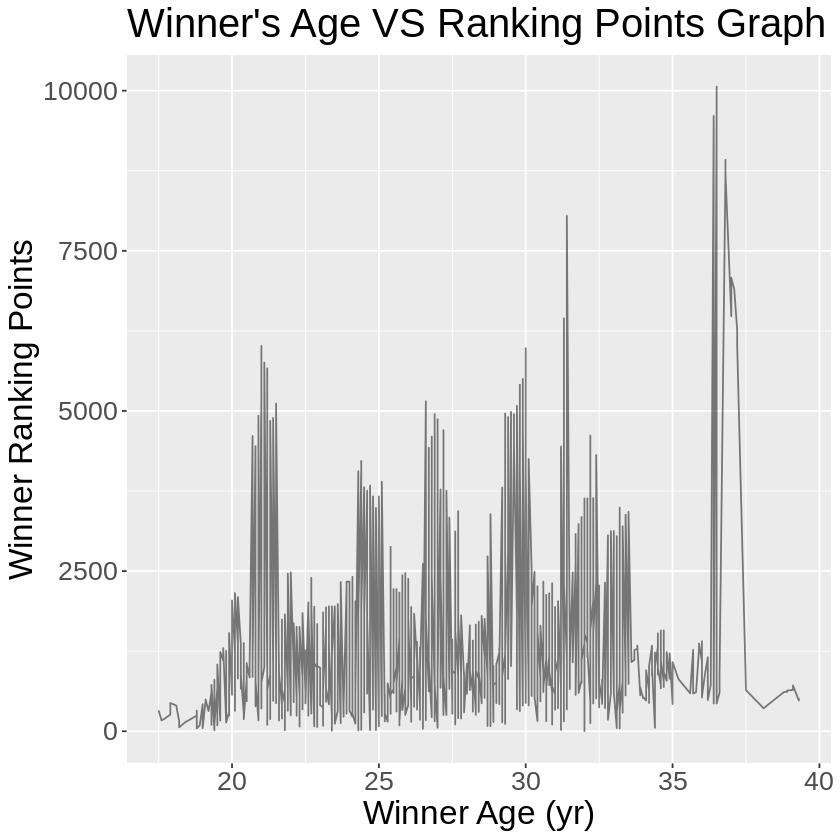

In [5]:
draft_plot <- ggplot (player_stats_with_predictor, aes(x = winner_age, y = winner_rank_points)) +
                    geom_line(alpha = 0.5) +
                    xlab("Winner Age (yr)") +
                    ylab("Winner Ranking Points") +
                    ggtitle("Winner's Age VS Ranking Points Graph") +
                    theme(text = element_text(size = 20))
draft_plot

Table 4. Winner's Age VS Ranking Points Graph

We plotted a graph of winner age against ranking points to determine an age threshold for categorization. Although there's a noticeable increase in ranking points around age 36, it lacks sufficient data points. Thus, we identified the largest rise between ages 20-35, approximately at age 31, defining "young" for ages 0-30 and "old" for 31 and above. Using the `ifelse()` function, we created a new column, `age_category`, in the dataset `player_stats_with_predictor`, categorizing players based on their age. If the winner's age is under 31, they're labeled "young"; otherwise, they're labeled "old". We then transformed the `age_category` column from character to factor type, with "young" and "old" as levels, resulting in `stats_with_category`. 



In [6]:
stats_with_category <- player_stats_with_predictor |> 
                       mutate(age_category = ifelse(winner_age < 31, "young", "old"))|>
                       mutate(age_category = factor(age_category, levels=c("young","old")))
head(stats_with_category)
print("Table 5. A preview of the cleaned dataset with age category")

winner_rank_points,winner_ht,winner_age,minutes,number_count,age_category
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
1010,183,25.6,123,2427,young
890,188,21.2,90,2427,young
809,188,31.3,145,2427,old
245,183,18.8,104,2427,young
299,188,19.9,69,2427,young
1231,180,29.1,93,2427,young


[1] "Table 5. A preview of the cleaned dataset with age category"


Table 5. A preview of the cleaned dataset with age category

### Data Splitting

We split the clean dataset into training and testing data using a 75:25 ratio to prevent overfitting and ensure fair parameter tuning. We start by setting the seed for reproducibility. Then, we use the 75-25 split ratio to divide the `stats_with_category` dataset into training and testing sets. The strata argument maintains the same proportion of the `winner_age` variable in both sets to preserve age distribution. Finally, we preview the training set with the `head()v function.

In [7]:
set.seed(99)

player_split <- initial_split(stats_with_category, prop=0.75, strata=winner_age)
player_training <- training(player_split)
player_testing <- testing(player_split)

head(player_training)


winner_rank_points,winner_ht,winner_age,minutes,number_count,age_category
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
245,183,18.8,104,2427,young
844,188,21.6,99,2427,young
992,188,22.9,150,2427,young
245,183,18.8,94,2427,young
299,188,19.9,152,2427,young
2010,193,22.6,132,2427,young


Table 6. A preview of the training set

### Summary Table

A summary table was created using the training data, grouping players into two categories: 'young' and 'old' based on their age. Summary statistics were calculated within each category, including the player count, mean height, mean ranking points, and mean game time. Although older players had fewer counts compared to younger players, we chose not to alter the data because the difference wasn't significant enough to affect the accuracy of the `k-nn` algorithm. Despite the smaller count of older players, it wouldn't greatly impact the algorithm's performance. Therefore, we maintained the original data integrity. Interestingly, while the mean heights of young and old players were similar, older players tended to have higher mean ranking points and slightly longer game times than younger players.


In [8]:
summary_table <- player_training |>
                 group_by(age_category)|>
                 summarize (number_count = n(),
                            mean_height = mean(winner_ht),
                            mean_rank_points = mean(winner_rank_points),
                            mean_game_time = mean(minutes))
summary_table


age_category,number_count,mean_height,mean_rank_points,mean_game_time
<fct>,<int>,<dbl>,<dbl>,<dbl>
young,1355,187.3675,1468.399,110.4723
old,464,188.2888,2067.170,112.7284


Despite the unbalanced count of young and old players, we opted against oversampling the underrepresented old player category. The difference of 1355 and 464 isn't extreme enough to significantly impact prediction accuracy, as the tablet accurately represents the proportion. Additionally, oversampling the smaller group risks bias and inaccurate model training. Given the insignificant difference, we believe maintaining accuracy without oversampling would be safer in this particular case.

Table 7. Summary Table Of The Mean Of Predictor Based On The Age Category

### Data Visualization
A scatter plots were created to compare the time it took for 'old' and 'young' players to win in relation to their number of rank points in the training data. Using `ggplot`, the minutes to win and the number of rank points were plotted on the x and y axes respectively, with `old` points in blue and `young` points in red. The x and y axis of the plot is not important, we are only observing the color distribution (age category),

In [9]:
Time_Rank_plot <- ggplot (player_training, aes(x = minutes, y = winner_rank_points)) +
                    geom_point(alpha = 0.5, aes(color = age_category)) +
                    xlab("Game Time (min)") +
                    ylab("Winner Rank Points") +
                    labs(colour = "Age Category") +
                    ggtitle("Game Time VS Winner's Rank Point Gragh") +
                    theme(text = element_text(size = 20))

time_rank_facet <- Time_Rank_plot +
    facet_grid(rows=vars(age_category))




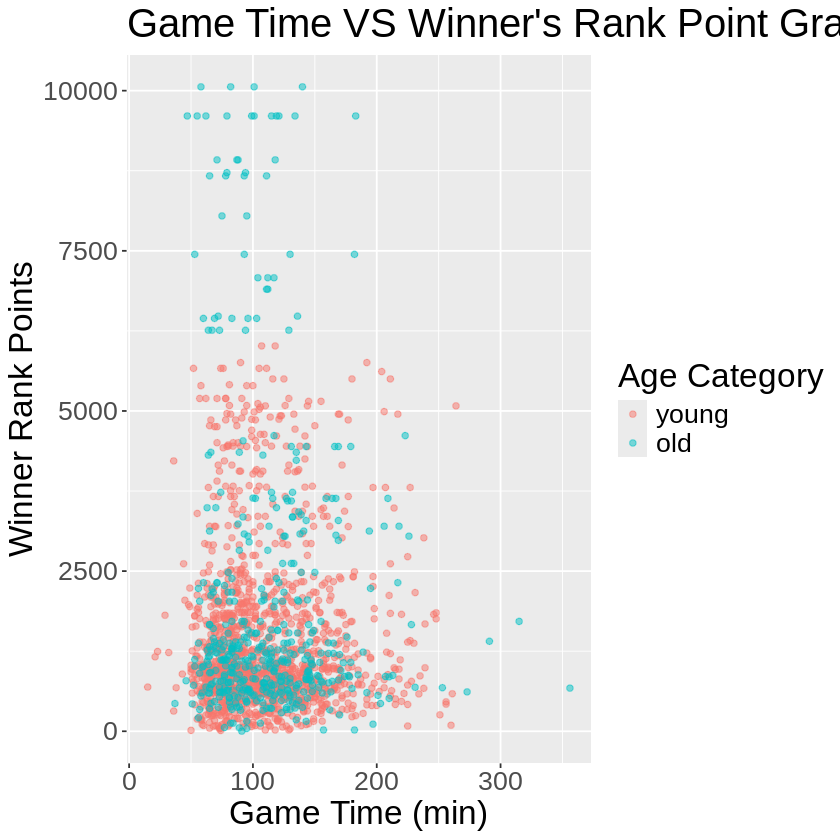

In [10]:
Time_Rank_plot

Figure 8. Game Time VS Winner's Rank Point Graph

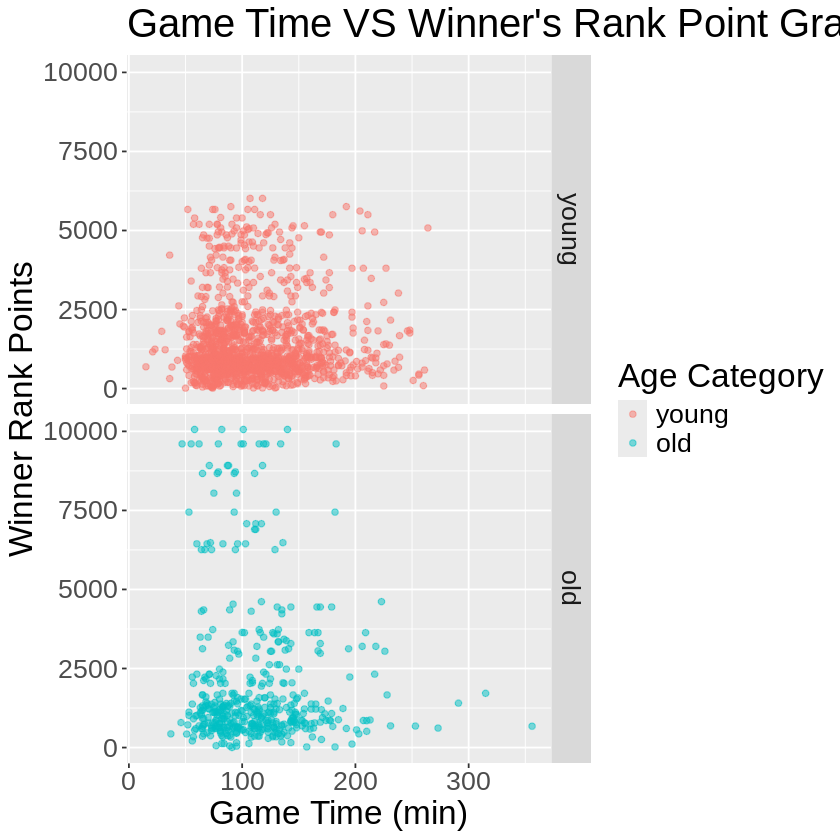

In [11]:
time_rank_facet

Figure 9. Game Time VS Winner's Rank Point Graph (seperated)

The graph illustrates that older players typically have higher rank points (blue points in upper left-middle), suggesting greater skills and experience. Younger players tend to have lower rank points (red points in bottom left-middle). Game duration for young players is mostly between 50-200 minutes, while for older players, it ranges from 50-250 minutes, indicating potential differences in physical health and reaction time.

A histogram comparing Winner's Height of each age category is created, where winner's heigh serves as the x-axis and red and blue represents different age categories respectively. We did not use scatter plot as the previous case because histogram reveals a more clear and obvious pattern of the height comparision. 


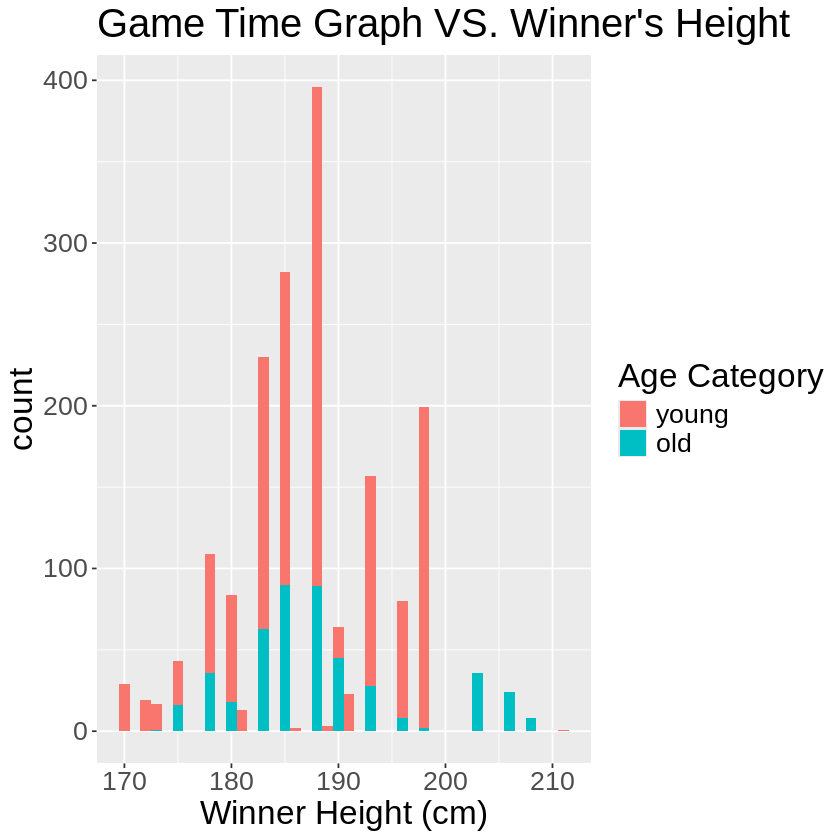

In [12]:
Time_Height_plot <- ggplot (player_training, aes(x = winner_ht, fill = age_category)) +
                    geom_histogram(binwidth = 1) +
                    xlab("Winner Height (cm)") +
                    labs(fill = "Age Category") +
                    ggtitle("Game Time Graph VS. Winner's Height") +
                    theme(text = element_text(size = 20))
Time_Height_plot



Table 10. Histogram of Winner's Height with Respect to Age Category

Due to the difference in sample sizes, we're observing the distribution rather than population per height. Both young and old players peak between 185cm to 190cm. However, above 200cm, older players dominate, likely due to growth patterns. This indicates that younger players generally have slightly lower heights compared to older players, possibly due to ongoing growth among players around 20 years old, whose recorded height may not be permanent at the time of data collection.


Here's a summary table showcasing the mean values of each predictor, aiding in visualizing the correlation between predictors and age.

In [13]:
updated_summary_step_1 <- pivot_longer (summary_table, cols = mean_height:mean_game_time, 
                                names_to = "mean", values_to = "count")


updated_summary_step_2 <- select(updated_summary_step_1, age_category, mean, count)


young_summary <- filter(updated_summary_step_2, age_category == "young")
old_summary <- filter(updated_summary_step_2, age_category == "old")



histogram_visualization <- ggplot (updated_summary_step_2, aes(x = mean, y = count, fill = age_category)) +
                           geom_bar (stat = "identity", position="dodge") +
                           xlab("mean counts") +
                           labs(fill = "age category") +
                           ggtitle("Predictor Means Bar Plot for Young Players")


In [14]:
updated_summary_step_2

age_category,mean,count
<fct>,<chr>,<dbl>
young,mean_height,187.3675
young,mean_rank_points,1468.3993
young,mean_game_time,110.4723
old,mean_height,188.2888
old,mean_rank_points,2067.1703
old,mean_game_time,112.7284


Table 10. Modified Summary Table

In [15]:
young_summary

age_category,mean,count
<fct>,<chr>,<dbl>
young,mean_height,187.3675
young,mean_rank_points,1468.3993
young,mean_game_time,110.4723


Table 11. Modified Summary Table for Young Players

In [16]:
old_summary

age_category,mean,count
<fct>,<chr>,<dbl>
old,mean_height,188.2888
old,mean_rank_points,2067.1703
old,mean_game_time,112.7284


Table 12. Modified Summary Table for Old Players

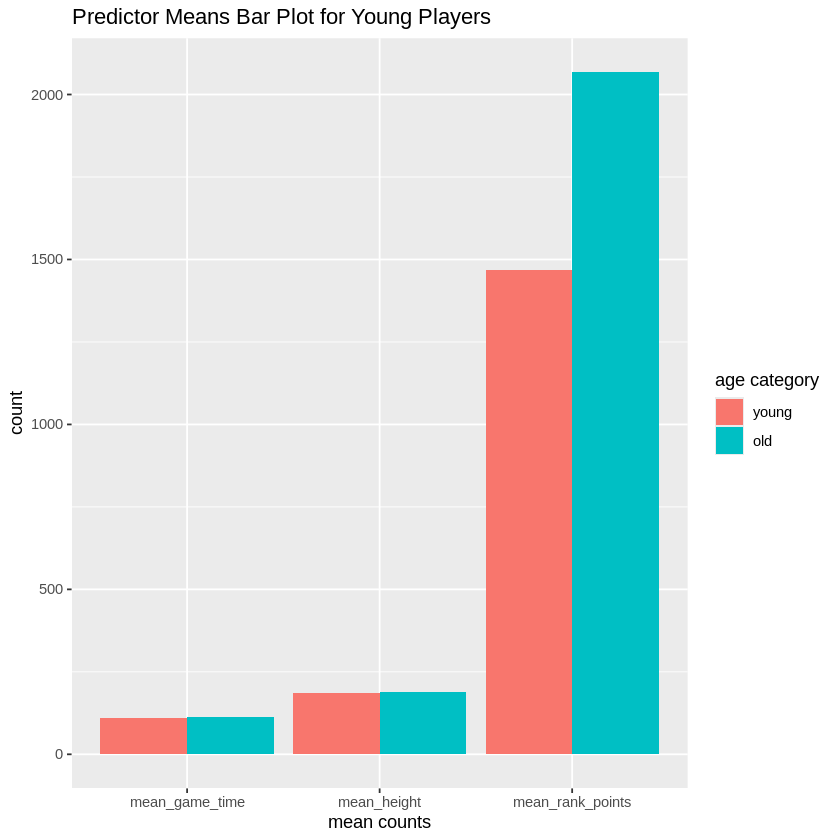

In [17]:
histogram_visualization

Figure 13. Comparision plot of the Mean of Each Predictors for Old and Young People

The above bar plot compares the mean values of predictors across age categories, specifically young and old players. Notably, mean game time shows no obvious difference between the two groups, while mean rank points exhibit a substantial contrast, indicating a significant performance variation between younger and older players. Although mean height appears similar initially, a closer examination reveals a slight advantage for older players. It's important to recognize that this plot is generated on a large scale; however, zooming in would unveil a subtle gap, confirming the slightly higher height among older players.

Upon analyzing the predictors' relationship with age, it's evident that height, game time, and rank points could serve as potential predictors for estimating the age of players, as they exhibit significant associations.

### Training Model

In model training process, we would use the k-nn algorithm to perform our four-predictor classification in predicting the age of players. From this analysis, we will use confusion matrix to evaluate the model (training data)'s performance towards the testing set.

The code sets the seed to 997 for reproducibility of the following codes, then performed k-nearest neighbors classification using cross-validation with 5 folds `vfold_cv` and stratification based on the `age_category` variable, ensuring that each fold contains proportional representation of the age_category variable. The latter function creates a tibble named player_vals with one column named neighbors. The column contains integers ranging from 1 to 50, inclusive. Each integer represents a different number of neighbors to be evaluated during tuning process for the k-nearest neighbors model.

A recipe is created specifying the predictors and outcome variable, followed by scaling and centering of predictors. The nearest neighbor model is specified with the "kknn" engine and classification mode. 

A workflow is created with the model added to specify how the data should be preprocessed before modeling, the type of model used with its settings and a grid search is performed to tune the number of neighbors using cross-validated accuracy as the metric. The results are collected and filtered to obtain accuracy estimates for different numbers of neighbors.

The accuracy versus number of neighbors is plotted, showing the relationship between the number of neighbors and the accuracy estimate. Finally, the model is fit with the optimal number of neighbors using the entire training dataset.

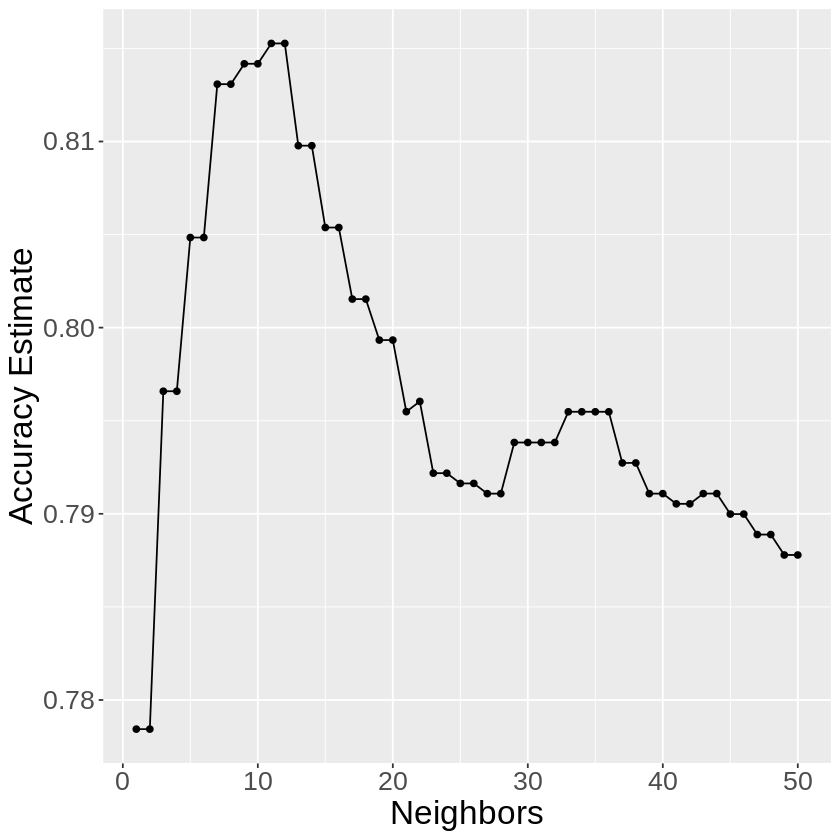

In [18]:
set.seed(997)

player_vfold <- vfold_cv(player_training, v = 5, strata = age_category)
player_vals <- tibble(neighbors = 1:50)


player_recipe <- recipe(age_category ~ winner_ht + minutes + winner_rank_points, data = player_training) |>
                        step_scale(all_predictors()) |>
                        step_center(all_predictors())
                        

player_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
               set_engine("kknn")|>
               set_mode("classification")

player_final_results <- workflow() |>
                       add_recipe(player_recipe) |>
                       add_model(player_spec) |>
                       tune_grid(resamples = player_vfold, grid = player_vals) |>
                       collect_metrics()

accuracies <- player_final_results |>
              filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                     geom_point() +
                     geom_line() +
                     labs(x = "Neighbors", y = "Accuracy Estimate") +
                     theme(text = element_text(size = 20)) 
                
accuracy_versus_k


player_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 11) |>
               set_engine("kknn")|>
               set_mode("classification")

player_fit <- workflow() |>
              add_recipe(player_recipe) |>
              add_model(player_spec) |>
              fit(data = player_training)


Table 14. Accuracy VS Neighbors Graph

From observing the Accuracy VS. Neighbors Gragh, a sharp rise is demonstrated at k=11, suggesting the model has its best performance when the nearest neighbor is 11. At this point, the model balances bias and variance well, capturing data structure effectively without overfitting or underfitting. Therefore, we would use k=11 for the final model. 

# Model Evaluation

In [19]:
player_recipe_prep <- prep(player_recipe, training = player_training)


player_testing_prepared <- bake(player_recipe_prep, new_data = player_testing)


predictions <- predict(player_fit, new_data = player_testing_prepared)
results <- bind_cols(player_testing, predictions)

accuracy <- metrics(results, truth = age_category, estimate = .pred_class)|>
         filter(.metric == "accuracy")

conf_matrix <- conf_mat(results, truth = age_category, estimate = .pred_class)

accuracy
conf_matrix

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7483553


          Truth
Prediction young old
     young   455 153
     old       0   0

Given the accuracy of 74.84%, it suggests that the model is fairly good at predicting the age category based on the available predictors (height, game duration, and rank points).

However, a significant observation shown in the confusion matrix is that the model never predicted anyone as "old". This could imply several things: the model may be biased towards predicting "young", and there might be a lack of data to accurately predict "old". Simply saying, this might be the consequence of not sampling the old and young data to 1:1 ratio. Nevertheless, we tried using the function "step_upsample" but encountered technical difficulties. Recognizing the issue here, in the future, we will be analzye the data more carefully to ensure a good model performance. 

# 3. Discussion

### What do you expect to find?

We expect to accurately predict player’s age based on the the predator height, game time and rank points.

### What impact could such findings have?

The impact of the model's findings has multifaceted implications for the world of tennis, particularly in how various stakeholders approach the development, management, and promotion of athletes. Firstly, the ability to predict a player's career trajectory based on height, ranking points, and game duration has significant potential to refine training programs. Coaches could potentially design personalized regimens that cater to an individual's predicted career arc, thereby optimizing their performance at different stages of their career. This sort of strategic training and development is crucial for maximizing an athlete's potential and extending their competitive lifespan in the sport.

Additionally, the predictive power of the model can be leveraged for more nuanced player management. With insights into the physical condition of players as they age, coaches and managers could strategically plan tournament schedules and training intensity. Such customization ensures that players are not overburdened at points when they might be more susceptible to injury or fatigue, ultimately safeguarding their well-being and continuity in the sport.

From a recruitment and investment standpoint, the findings offer valuable predictive insights that can guide teams and sponsors in making decisions. Investing in players whose age-related performance projections align with long-term strategic goals could lead to more successful and financially prudent partnerships. The ability to predict a player's future performance based on current attributes allows for a more informed selection process that looks beyond immediate results.

The model also contributes to the ongoing conversation about the physical dynamics of tennis players. By providing empirical evidence, it may confirm or challenge existing stereotypes about age-related performance in tennis. This not only has implications for player development and coaching but also contributes to the scientific understanding of athlete physiology and its relationship with competitive sports performance.


### What future questions could this lead to?

- Can we use height to predict rankings of left-handed players?
- If height is a predictor, can weight also affect a player's ranking? (as they combined to perform calculations of BMI)
- Depending on the relationship seen, will these results affect a new player's interest in pursueing a professional career?
-  Is there a different pattern of performance for left-handed players, and does cross-dominance (the hand used for playing vs. the hand used for other tasks) play a role in player performance?
-  Could incorporating other physical measures, such as weight or even genetic markers, provide a more complete predictive model for player performance?
-  What factors contribute most significantly to the length and success of a player's career, and how can these be influenced or optimized?
-  As players age, how do their playing techniques evolve, and can changes in technique be predictive of career phase transitions?
-  Could insights from the model influence how young talents are nurtured, focusing on attributes that might predict a longer peak performance phase?

(In terms of model performance, we can further explore how to upsample the data to 1:1 ratio properly, and what will happen to the accuracy after upsampling) 

# 4. References: 

Jain, P. (July, 2022). Why does Rafael Nadal play left-handed? Find out what else can the Grand Slam record-holder do with his left hand. Sportskeeda. https://www.sportskeeda.com/tennis/news-why-rafael-nadal-play-left-handed-find-else-can-grand-slam-record-holder-left-hand#

Sissons, C. (December, 2023). What age do boys stop growing?. Medical News Today. https://www.medicalnewstoday.com/articles/320676

Tanaka, H. Toussaint, J-F. (Feburary, 2023). Editorial: Growth, peaking, and aging of competitive athletes.     
doi: 10.3389/fphys.2023.1165223 
